# Standard bank loan worthiness

we are going to work on binary classification problem, where we got some information about sample of peoples , and we need to predict whether we should give some one a loan or not depending on his information . we actually have a few sample size (614 rows), so we will go with machine learning techniques to solve our problem .

In [169]:
import pandas as pd
import numpy as np
import sweetviz 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [170]:
train = pd.read_csv("H:\\Level 4 Information Systems\\Projects\\Standard Bank LoanHouse Department\\train.csv")
test = pd.read_csv("H:\\Level 4 Information Systems\\Projects\\Standard Bank LoanHouse Department\\test.csv")

In [171]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [172]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Part One Auto Exploratory Data Analysis (Auto EDA)


The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 


In [ ]:
#autoEDA = sweetviz.analyze(train)
#autoEDA.show_notebook()

# 1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [175]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


- train data set : # of records of : 614 , # of fields : 13, dtypes: float64(4), int64(1), object(8) |
- test data set : # of records of : 367  , # of fields : 12, dtypes: float64(3), int64(2), object(7)

# 2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

In [176]:
print("Missing Values overview : ") 
print(train.isnull().sum().sort_values(ascending=False))
print("-----------------------")
print("duplicated values overview : ", train.duplicated().sum())

Missing Values overview : 
Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64
-----------------------
duplicated values overview :  0


In [177]:
print("Missing Values overview : ")
print(test.isnull().sum().sort_values(ascending=False))
print("-----------------------")
print("duplicated values overview : ", test.duplicated().sum())

Missing Values overview : 
Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64
-----------------------
duplicated values overview :  0


# 3. How do the the loan statuses compare? i.e. what is the distrubition of each?

In [178]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# 4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

In [179]:
Gender = ['Male', 'Female']
metric_1 = pd.crosstab(train['Gender'], train['Loan_Status'],
                      rownames=['Gender'], colnames=['Loan_Status'])
metric_1

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


# 5. How many of the loan applicants have dependents based on the historical dataset?

In [180]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# 6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

In [181]:
Employed_income = sum(train.loc[train['Self_Employed'] == 'No','ApplicantIncome'])
Self_Employed_income = sum(train.loc[train['Self_Employed'] == 'Yes','ApplicantIncome'])

print("the income of employed applicant : ", Employed_income)
print("the income of self_employed applicant : ",Self_Employed_income)

the income of employed applicant :  2524874
the income of self_employed applicant :  605227


# 7. Are applicants with a credit history more likely to default than those who do not have one?

In [182]:
Credit_History = ['1', '0']
metric_2 = pd.crosstab(train['Credit_History'], train['Loan_Status'],
                      rownames=['Credit_History'], colnames=['Loan_Status'])
metric_2

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


the answer is no, because more credit history more loan approval inhence no default

# 8. Is there a correlation between the applicant's income and the loan amount they applied for? 

Based on the previous AutoEdA
"Yes, the numerical association between loan amount & ApplicantIncome = 0.57 & CoapplicantIncome = 0.19"

# Part Two

# Using Logistic Regression implement a model that will predict if the potential borrower will default on his/her loan or not,

process of many processes to be get good model performance is to fill the missing values
& we have categorical and numerical data so we will
- split the categorical from numerical values
- fill either numerical or categorical missing values
- for categorical we will use most frequent value to fill
- for numerical we will use most frequent value to fill
- encode categorical values
- concatonate the numerical and categorical values again to be ready for train the model

# Correlation Matrix (Feature Selection) 

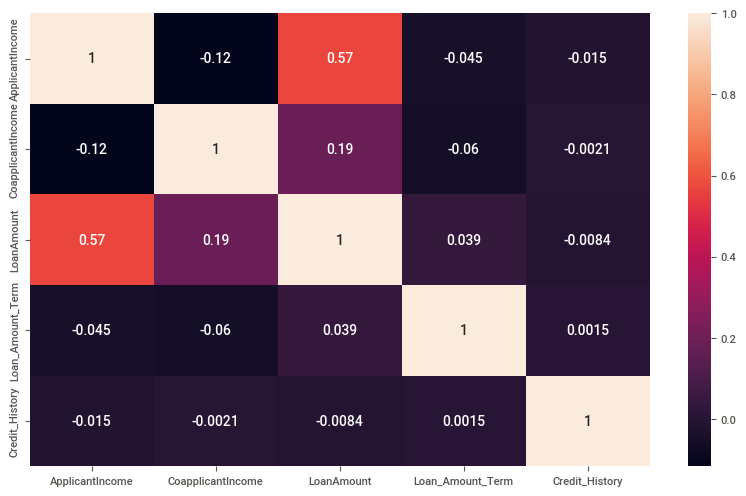

In [183]:
corr = train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True);

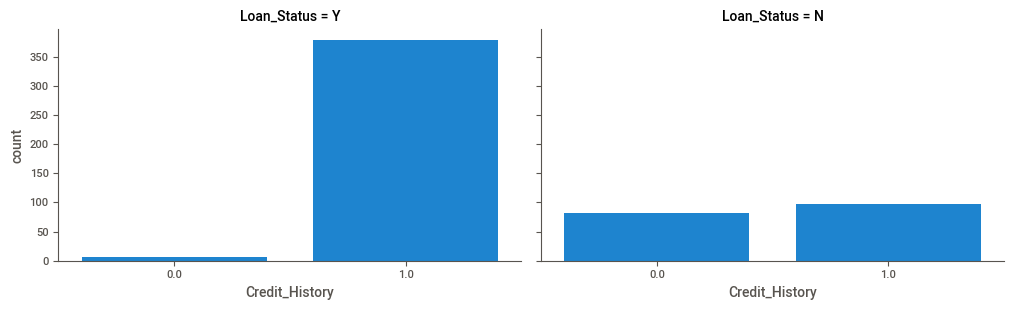

In [184]:
# Credit_History

grid = sns.FacetGrid(train,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan

# important feature

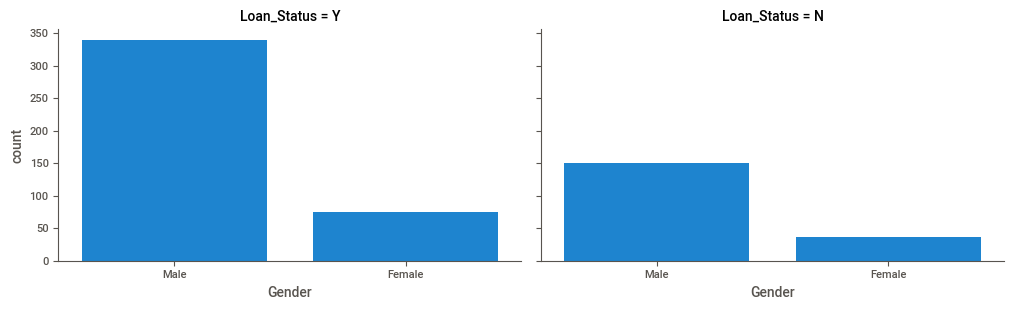

In [185]:
# Gender

grid = sns.FacetGrid(train,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

# most males got loan and most females got one too so (No pattern)

# i think it's not so important feature, we will see later

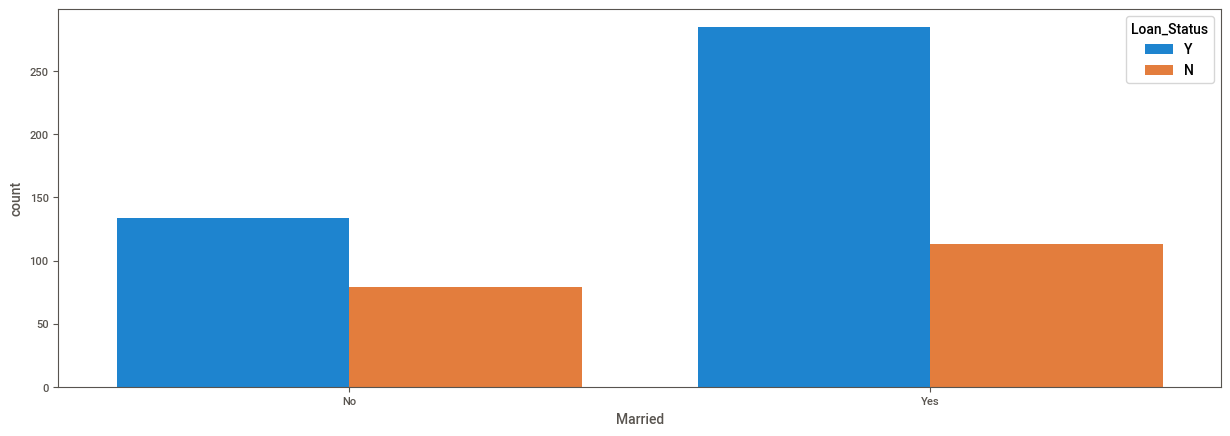

In [186]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=train);

# most people who get married did get a loan
# if you'r married then you have better chance to get a loan :)
# good feature

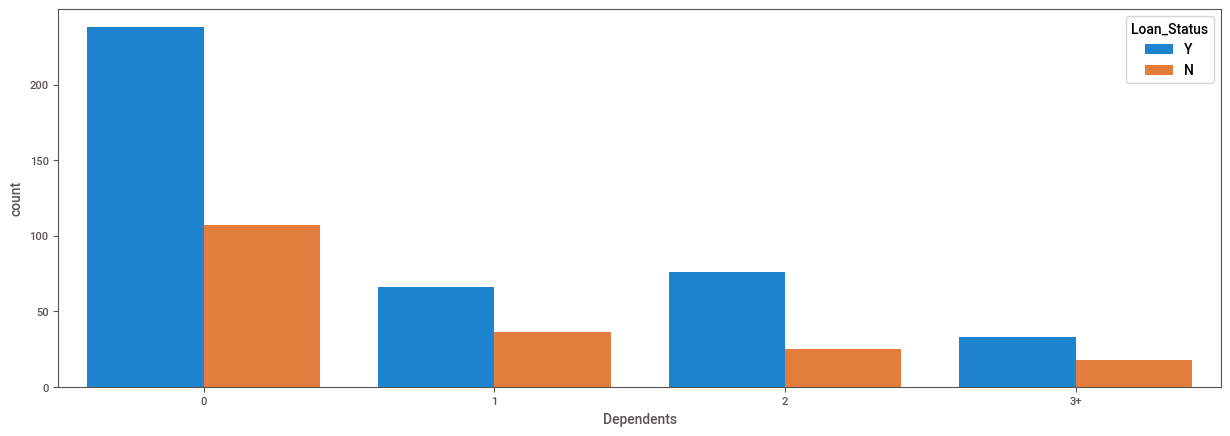

In [187]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=train);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

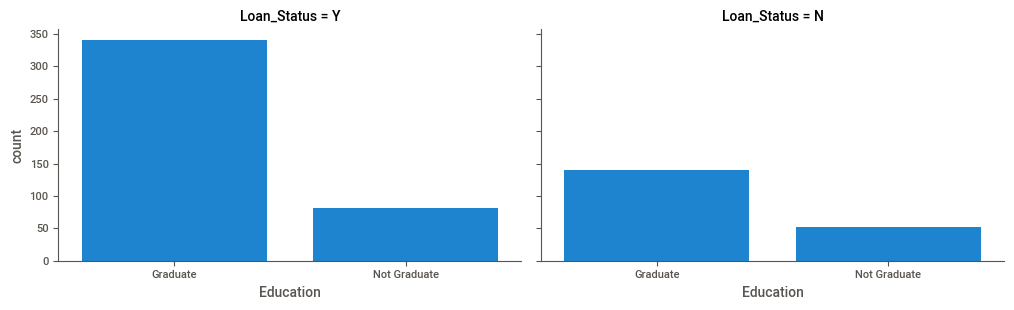

In [188]:
# Education

grid = sns.FacetGrid(train,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

# not important feature

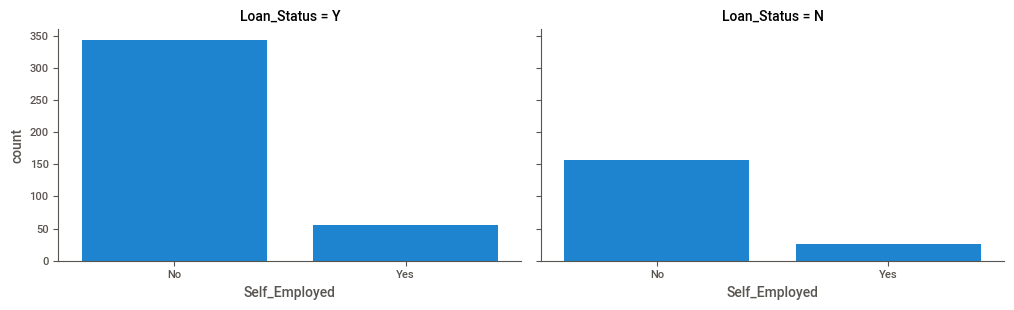

In [189]:
# Self_Employed

grid = sns.FacetGrid(train,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

# No pattern (same as Education)

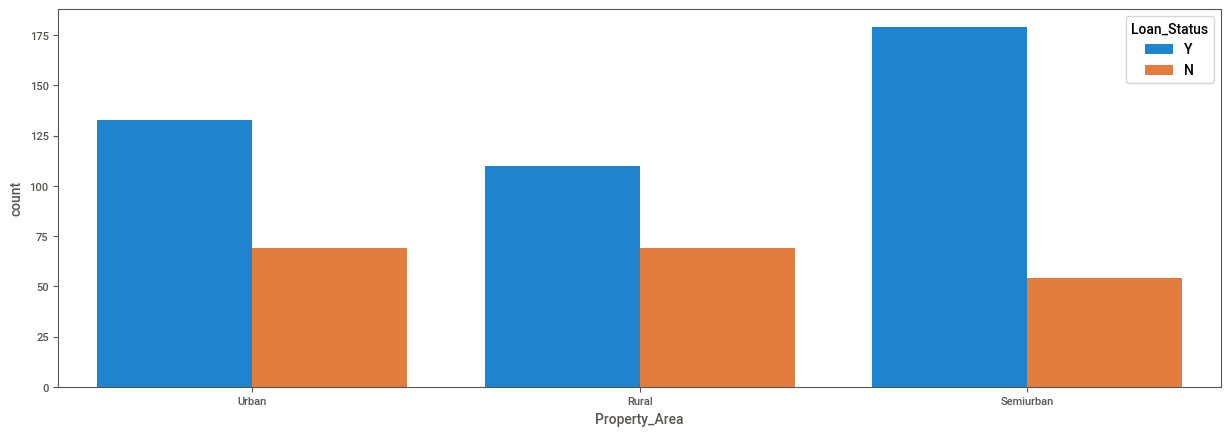

In [190]:
# Property_Area

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train);

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature

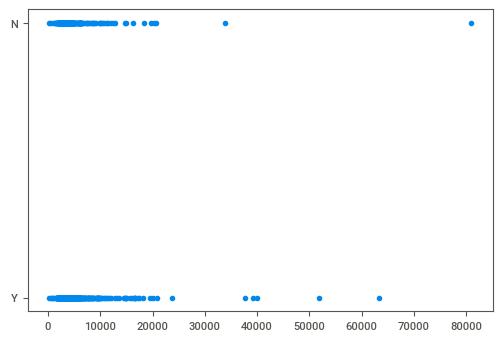

In [191]:
# ApplicantIncome

plt.scatter(train['ApplicantIncome'], train['Loan_Status']);

# No pattern

In [192]:
# the numerical data

train.groupby('Loan_Status').median() # median because Not affected with outliers

# we can see that when we got low median in CoapplicantInocme we got Loan_Status = N

# CoapplicantInocme is a good feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


# Fill missing values

In [193]:
# we will drop ID because it's not important for our model and it will just mislead the model
train.drop('Loan_ID', axis=1, inplace=True)

# We will separate the numerical columns from the categorical
cat_data = []
num_data = []

for i,c in enumerate(train.dtypes):
    if c == object:
        cat_data.append(train.iloc[:, i])
    else :
        num_data.append(train.iloc[:, i])

In [194]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [195]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [196]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [197]:
#fill every column with its own most frequent value you can use
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [198]:
#fill every column with its own most frequent value you can use
num_data = num_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
num_data.isnull().sum().any() # no more missing data 

False

# Encoding caegorical values

In [199]:
#for encoding caegorical values we are going to use LabelEncoder :
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [200]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [201]:
train = pd.concat([num_data, cat_data], axis=1)
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,120.0,360.0,1.0,1,0,0,0,0,2,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1


# Model Build

In [202]:
y = train['Loan_Status']
x = train.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [203]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

# Model Evaluate

In [204]:
#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',round(accuracy_score(y_predict,y_test)*100,4))

              precision    recall  f1-score   support

           0       0.88      0.43      0.58        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.70      0.74       185
weighted avg       0.84      0.83      0.81       185

accuracy is 82.7027


In [205]:
Logistic_Regression=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predict})
Logistic_Regression[0:20]

,Actual Value,Predicted Value
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
62,0,0
539,1,1
432,1,1
367,0,0
482,1,1


# let's pre-processing home loan test data

In [206]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [207]:
# we will drop ID because it's not important for our model and it will just mislead the model
loan_id = test['Loan_ID']
test.drop('Loan_ID', axis=1, inplace=True)

# We will separate the numerical columns from the categorical
cat_data_2 = []
num_data_2 = []

for i,c in enumerate(test.dtypes):
    if c == object:
        cat_data_2.append(test.iloc[:, i])
    else :
        num_data_2.append(test.iloc[:, i])

In [208]:
cat_data_2 = pd.DataFrame(cat_data_2).transpose()
num_data_2 = pd.DataFrame(num_data_2).transpose()

In [209]:
#fill every column with its own most frequent value you can use
cat_data_2 = cat_data_2.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data_2.isnull().sum().any() # no more missing data 

False

In [210]:
#fill every column with its own most frequent value you can use
num_data_2 = num_data_2.apply(lambda x:x.fillna(x.value_counts().index[0]))
num_data_2.isnull().sum().any() # no more missing data 

False

In [211]:
#for encoding caegorical values we are going to use LabelEncoder :
le_2 = LabelEncoder()
for i in cat_data_2:
    cat_data_2[i] = le_2.fit_transform(cat_data_2[i])

In [212]:
test = pd.concat([num_data_2, cat_data_2], axis=1)
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5720.0,0.0,110.0,360.0,1.0,1,1,0,0,0,2
1,3076.0,1500.0,126.0,360.0,1.0,1,1,1,0,0,2
2,5000.0,1800.0,208.0,360.0,1.0,1,1,2,0,0,2
3,2340.0,2546.0,100.0,360.0,1.0,1,1,2,0,0,2
4,3276.0,0.0,78.0,360.0,1.0,1,0,0,1,0,2


# predict the worthiness of home loan borrowers

In [214]:
y_predict_2 = pd.DataFrame(LR.predict(test))
y_predict_2.columns =['Predicted_Loan_Status']
dataFrame = pd.concat([loan_id, y_predict_2], axis=1)

dataFrame

,Loan_ID,Predicted_Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1
